<a href="https://colab.research.google.com/github/mohammedterry/ANNs/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG-16

In [0]:
import keras

vgg_model = keras.models.Sequential()

for block,h_dim in enumerate((64,128,256,512,512),start=1):
  for layer in range(1,4):
    if layer < 3 or block > 2:
      if block==1 and layer == 1:
        vgg_model.add(keras.layers.convolutional.ZeroPadding2D((1, 1), input_shape=(224, 224, 3))) 
      else:
        vgg_model.add(keras.layers.convolutional.ZeroPadding2D((1, 1)))
      vgg_model.add(keras.layers.convolutional.Conv2D(h_dim, (3, 3), activation='relu', name=f'conv{block}_{layer}'))
  vgg_model.add(keras.layers.convolutional.MaxPooling2D((2, 2), strides=(2, 2)))
  
vgg_model.add(keras.layers.core.Flatten())
for _ in range(2):
  vgg_model.add(keras.layers.core.Dense(4096, activation='relu'))
  vgg_model.add(keras.layers.core.Dropout(.5))
vgg_model.add(keras.layers.core.Dense(1000, activation='softmax'))

In [0]:
!wget https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5
vgg_model.load_weights('vgg16_weights_tf_dim_ordering_tf_kernels.h5')

In [0]:
!wget https://raw.githubusercontent.com/machrisaa/tensorflow-vgg/master/synset.txt
import numpy as np
vgg_labels = np.loadtxt('synset.txt', str, delimiter='\t')

In [0]:
vgg_model.compile(optimizer=keras.optimizers.SGD(), loss='categorical_crossentropy')

# Image Classification

In [6]:
!wget https://i.ebayimg.com/images/g/1ckAAOSwq9Rbz3AO/s-l300.jpg
!wget https://secretldn.com/wp-content/uploads/2018/03/Animals-5.jpg
!wget https://wallimpex.com/data/out/636/wild-animal-pictures-9925191.jpg
!wget https://i.pinimg.com/originals/c7/98/6c/c7986cb4b3017d976cbf17efcb184a36.jpg
!wget https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/red-wine-pouring-eli-asenova.jpg

--2019-05-16 20:16:35--  https://i.ebayimg.com/images/g/1ckAAOSwq9Rbz3AO/s-l300.jpg
Resolving i.ebayimg.com (i.ebayimg.com)... 184.27.137.127, 2600:1402:f000:593::24d4, 2600:1402:f000:58b::24d4
Connecting to i.ebayimg.com (i.ebayimg.com)|184.27.137.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10878 (11K) [image/jpeg]
Saving to: ‘s-l300.jpg’

s-l300.jpg          100%[===================>]  10.62K  --.-KB/s    in 0s      

2019-05-16 20:16:36 (200 MB/s) - ‘s-l300.jpg’ saved [10878/10878]

--2019-05-16 20:16:37--  https://secretldn.com/wp-content/uploads/2018/03/Animals-5.jpg
Resolving secretldn.com (secretldn.com)... 52.18.247.126, 52.30.73.173
Connecting to secretldn.com (secretldn.com)|52.18.247.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96907 (95K) [image/jpeg]
Saving to: ‘Animals-5.jpg’

Animals-5.jpg       100%[===================>]  94.64K  --.-KB/s    in 0.1s    

2019-05-16 20:16:37 (991 KB/s) - ‘Animals-5.jpg’ s

In [0]:
import glob
image_files = glob.glob("*.jpg")

In [0]:
batch = []

import cv2 
for image_file in image_files:
  img = cv2.imread(image_file)
  img = cv2.resize(img, (224, 224))
  batch.append(img)
  
batch = np.array(batch)

In [0]:
predictions = vgg_model.predict(batch)

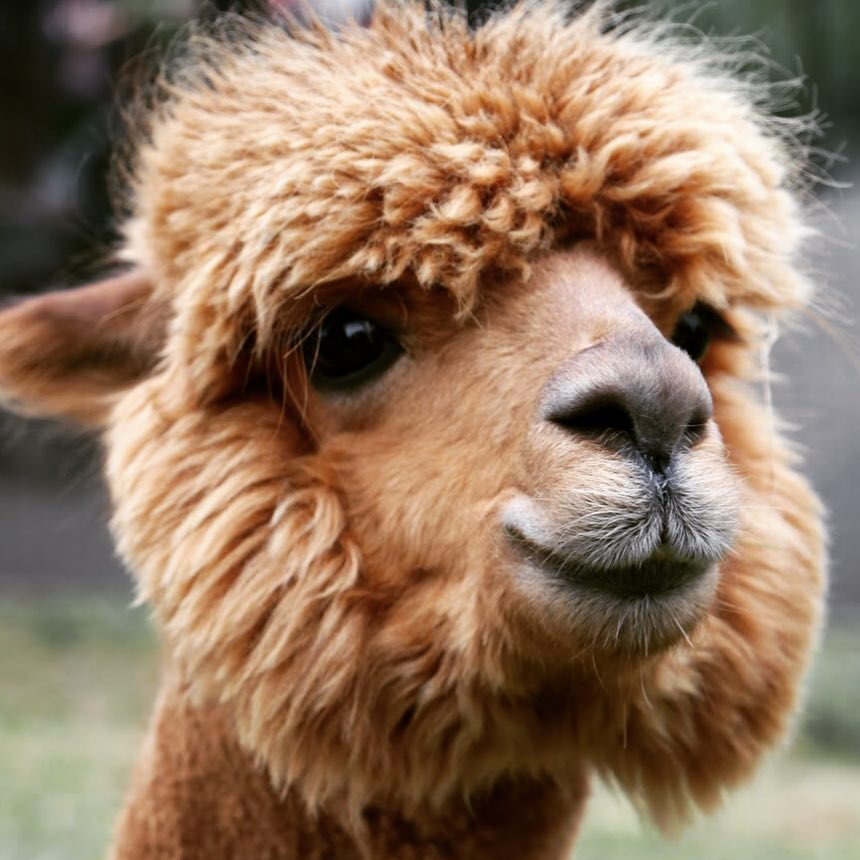

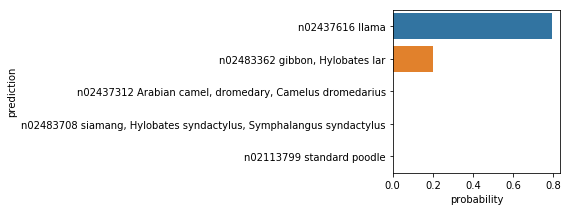

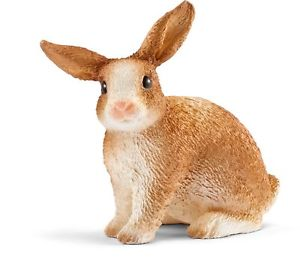

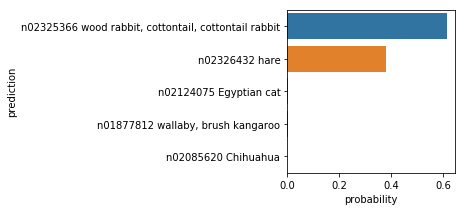

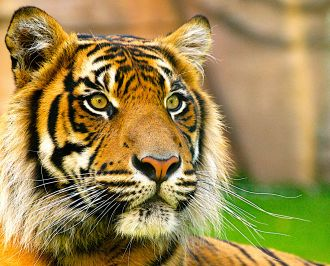

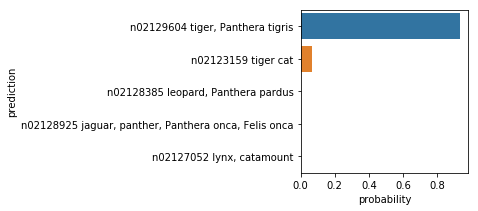

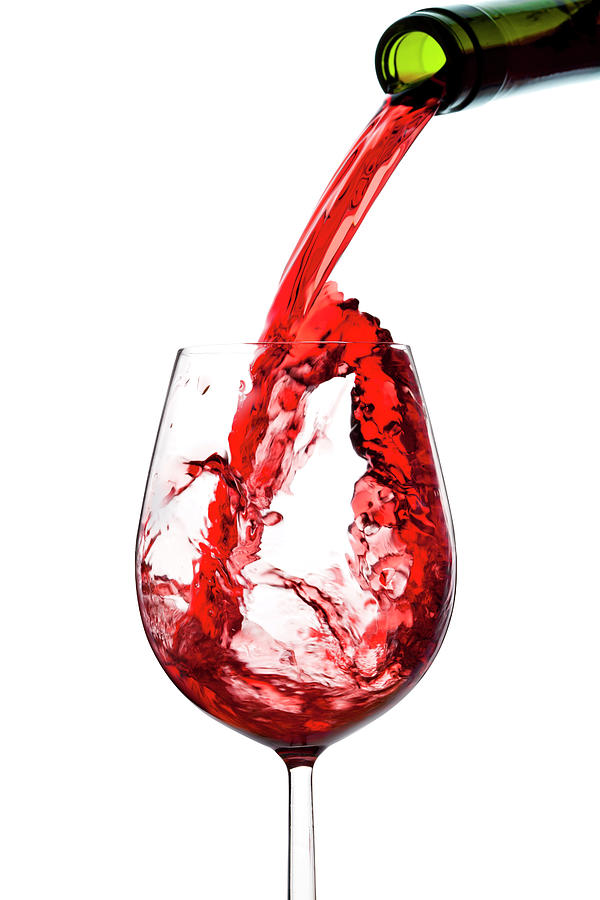

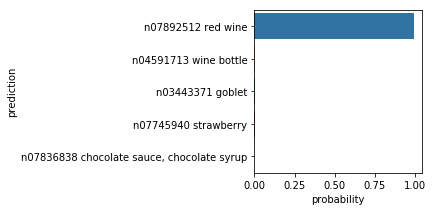

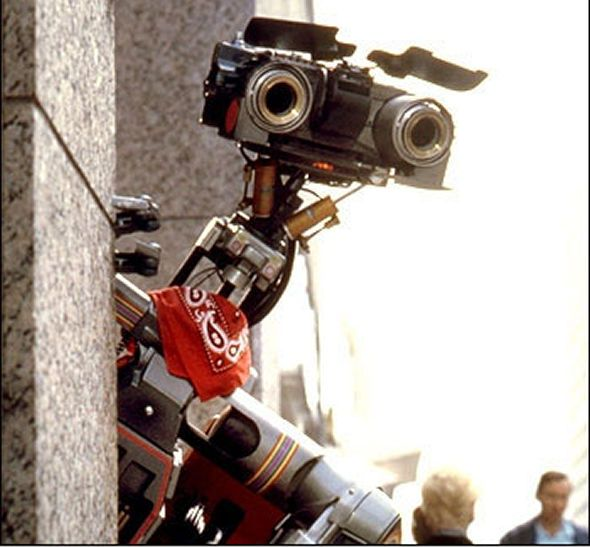

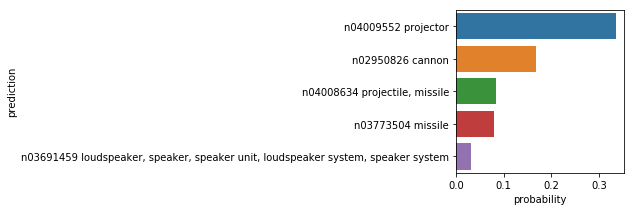

In [10]:
from IPython.display import Image, display
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (3,3)

for p,f in zip(predictions,image_files):
  display(Image(f,width=100, height=100))
  sns.barplot(x='probability', y="prediction", data=pd.DataFrame({"prediction":vgg_labels[p.argsort()[-5:][::-1]],"probability":np.sort(p)[-5:][::-1]}))
  plt.show()

# Transfer Learning

## Training Data

## Image Embeddings

In [0]:
N_CLASSES = 3
VEC_LEN = 25088

In [0]:
def embed_images(image_files, embedding_model):
  batch = []
  for image_file in image_files:
    img = cv2.imread(image_file)
    img = cv2.resize(img, (224, 224))
    batch.append(img)
  batch = np.array(batch)
  return embedding_model.predict(batch)

In [0]:
for _ in range(5):
  vgg_model.pop()
vgg_model.compile(optimizer=keras.optimizers.SGD(), loss='categorical_crossentropy')

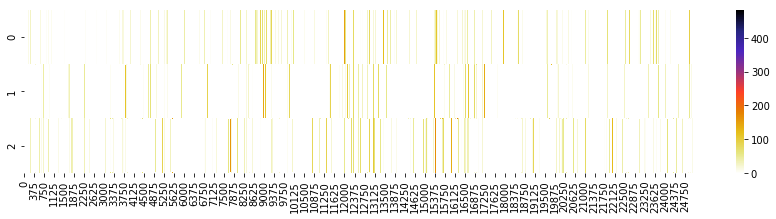

In [41]:
image_vectors = embed_images(image_files, vgg_model)

plt.rcParams["figure.figsize"] = (15,3)
sns.heatmap(image_vectors[:3], cmap="CMRmap_r")

## MultiClass Classifiers

In [0]:
from sklearn.neural_network import MLPClassifier

ffnn = MLPClassifier(hidden_layer_sizes=(100, 100)) 
ffnn.fit(X,Y)

predictions = ffnn.predict(X)

In [0]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X, Y)

predictions = random_forest.predict(X)

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier

gradient_boost = OneVsRestClassifier(XGBClassifier())
gradient_boost.fit(X, Y)

predictions = gradient_boost.predict(X)